# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={"figure.figsize": (10,5)})

DATA_PATH = "../Data/us_accidents_sample_500k_clean.csv"
df = pd.read_csv(DATA_PATH, parse_dates=["Start_Time"], low_memory=False)
df = df.dropna(subset=["Start_Time", "Lat", "Lng"])


# Traffic density proxies

In [2]:
df["Hour"] = df["Start_Time"].dt.hour
df["Dow"] = df["Start_Time"].dt.dayofweek

df["RushHour"] = df["Hour"].isin([7,8,16,17,18]).astype(int)
df["Is_Weekday"] = df["Dow"].isin([0,1,2,3,4]).astype(int)


# Compute Accident Frequency by Weather & Traffic Group

In [3]:
df["Weather_Simple"].value_counts(dropna=False)


Weather_Simple
Clear      197016
Cloudy     187770
Rain        31364
Fog         11999
Unknown     10002
Snow         9966
Storm        3588
Other         169
Name: count, dtype: int64

In [4]:
weather_counts = df.groupby("Weather_Simple").size().sort_values(ascending=False)
weather_counts


Weather_Simple
Clear      197016
Cloudy     187770
Rain        31364
Fog         11999
Unknown     10002
Snow         9966
Storm        3588
Other         169
dtype: int64

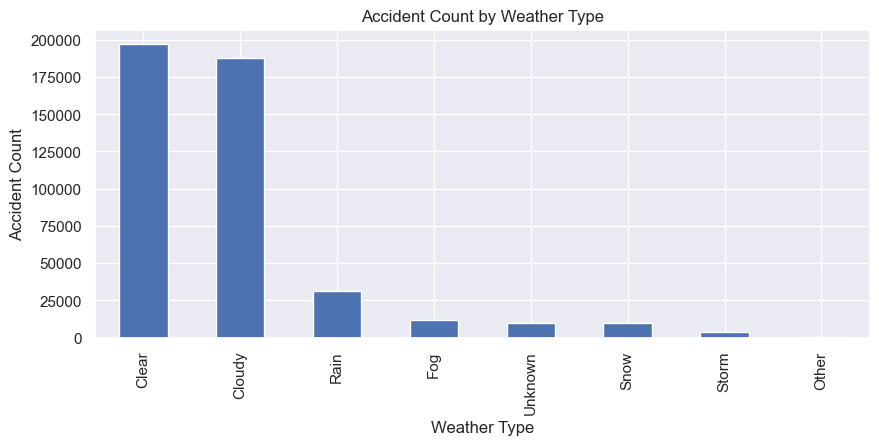

In [5]:
weather_counts.plot(kind="bar", figsize=(10,4), title="Accident Count by Weather Type")
plt.xlabel("Weather Type")
plt.ylabel("Accident Count")
plt.show()


# Accident Rate: Rush Hour vs Non-Rush Hour by Weather

In [6]:
rush_weather = df.groupby(["Weather_Simple", "RushHour"]).size().unstack(fill_value=0)
rush_weather


RushHour,0,1
Weather_Simple,,
Clear,126495,70521
Cloudy,118825,68945
Fog,7425,4574
Other,117,52
Rain,20253,11111
Snow,6668,3298
Storm,2088,1500
Unknown,6711,3291


In [7]:
rush_weather_pct = rush_weather.div(rush_weather.sum(axis=1), axis=0)
rush_weather_pct


RushHour,0,1
Weather_Simple,,
Clear,0.642054,0.357946
Cloudy,0.632822,0.367178
Fog,0.618802,0.381198
Other,0.692308,0.307692
Rain,0.645740,0.354260
Snow,0.669075,0.330925
Storm,0.581940,0.418060
Unknown,0.670966,0.329034


Plot

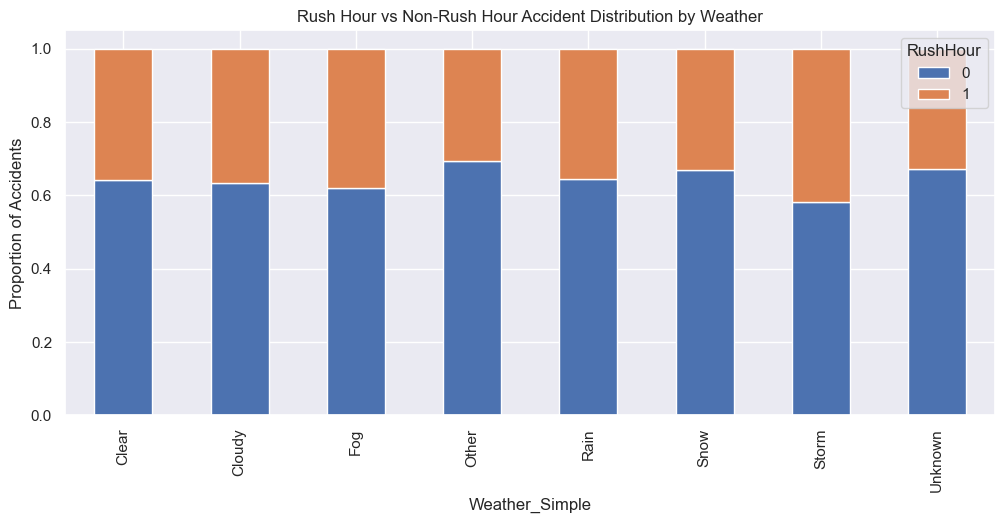

In [8]:
rush_weather_pct.plot(kind="bar", stacked=True, figsize=(12,5),
                      title="Rush Hour vs Non-Rush Hour Accident Distribution by Weather")
plt.ylabel("Proportion of Accidents")
plt.show()


# Severity vs Weather

In [9]:
df["Is_Severe"] = df["Severity"].isin([3,4]).astype(int)

severity_by_weather = df.groupby("Weather_Simple")["Is_Severe"].mean().sort_values(ascending=False)
severity_by_weather


Weather_Simple
Rain       0.253188
Unknown    0.241452
Cloudy     0.234377
Snow       0.231688
Storm      0.208751
Clear      0.187442
Fog        0.177265
Other      0.094675
Name: Is_Severe, dtype: float64

Plot

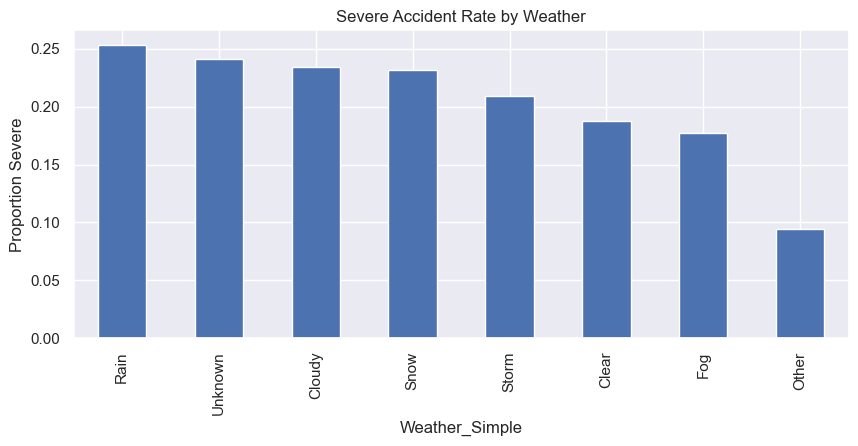

In [10]:
severity_by_weather.plot(kind="bar", figsize=(10,4),
                         title="Severe Accident Rate by Weather")
plt.ylabel("Proportion Severe")
plt.show()


# Heatmap: Weather × Hour of Day

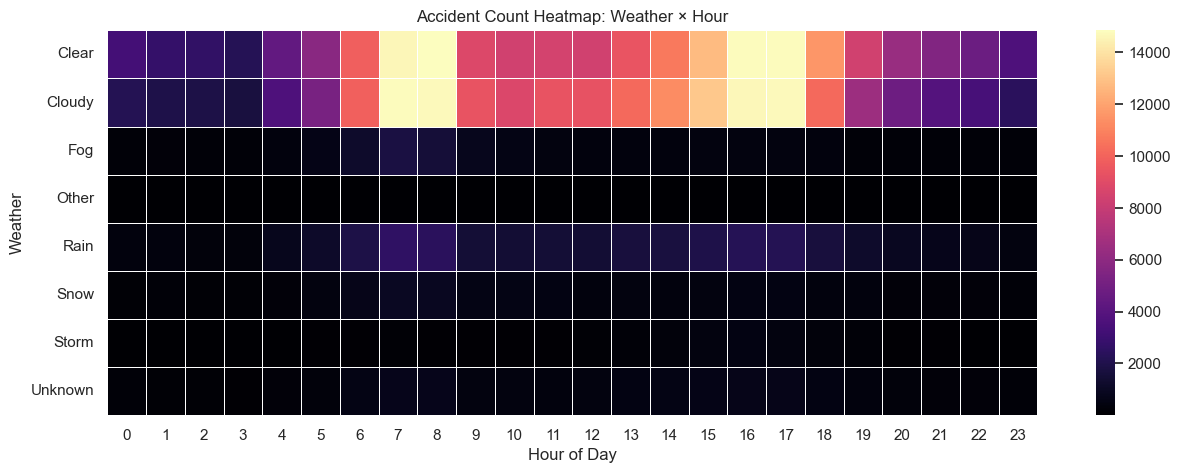

In [11]:
pivot = df.pivot_table(index="Weather_Simple", columns="Hour", values="ID", aggfunc="count")
plt.figure(figsize=(15,5))
sns.heatmap(pivot, cmap="magma", linewidths=.5)
plt.title("Accident Count Heatmap: Weather × Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Weather")
plt.show()


# Final Summary  
* a